# Creating a Linear Regression algo from scratch

In [26]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
import random

In [6]:
xs=np.array([1,2,3,4,5,6],dtype=np.float64)
ys=np.array([5,4,6,5,6,7],dtype=np.float64)

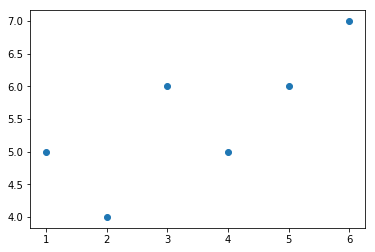

In [7]:
plt.scatter(xs,ys)
plt.show()

## Calculating the slope and intercept of the best fit line

In [17]:
def best_fit_slope_and_intercept(xs,ys):
    m=(((mean(xs)*mean(ys))-mean(xs*ys))/
       ((mean(xs)**2)-(mean(xs*xs))))
    b=mean(ys)-m*mean(xs)
    return m,b
m,b=best_fit_slope_and_intercept(xs,ys)

In [18]:
print(m,b)

0.428571428571 4.0


## Creating the regression line

In [19]:
regression_line=[(m*x)+b for x in xs]

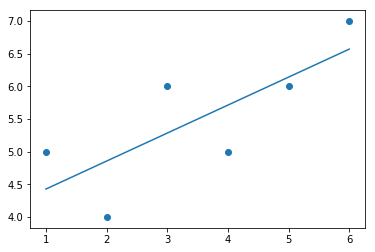

In [20]:
plt.scatter(xs,ys)
plt.plot(xs,regression_line)
plt.show()

## Predicting using our Regression

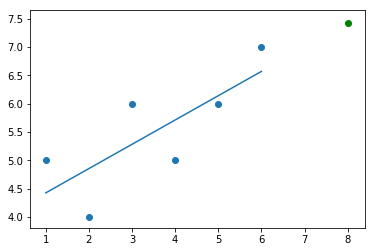

In [21]:
predict_x=8
predict_y=m*predict_x+b
plt.scatter(xs,ys)
plt.scatter(predict_x,predict_y,color='g')
plt.plot(xs,regression_line)
plt.show()

----

## Calculating the Accuracy of our Model

Higher the r^2 value more the accuracy

In [22]:
def squared_error(ys_original,ys_line):
    return sum((ys_line-ys_original)**2)

In [23]:
def coefficient_of_determination(ys_original,ys_line):
    y_mean_line=[mean(ys_original) for y in ys_original]
    squared_error_regr=squared_error(ys_original,ys_line)
    squared_error_y_mean=squared_error(ys_original,y_mean_line)
    return 1-(squared_error_regr/squared_error_y_mean)

In [24]:
r_squared=coefficient_of_determination(ys,regression_line)

In [25]:
r_squared

0.5844155844155845

---

# Testing our assumptions

In [35]:
def create_dataset(hm,variance,step=2,correlation=False):
    val=1
    ys=[]
    for i in range(hm):
        y=val+random.randrange(-variance,variance)
        ys.append(y)
        if correlation and correlation=='pos':
            val+=step
        elif correlation and correlation=='neg':
            val-=step
        xs=[i for i in range(len(ys))]    
    return np.array(xs,dtype=np.float64),np.array(ys,dtype=np.float64)

In [45]:
xs,ys=create_dataset(40,10,2,correlation='pos')

In [46]:
print(xs,ys)

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.
  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.] [ -1.   7.   9.   9.   0.  16.  17.   7.  24.  14.  18.  24.  29.  29.  32.
  29.  34.  37.  41.  47.  32.  50.  38.  40.  39.  47.  47.  56.  63.  60.
  58.  59.  69.  72.  61.  67.  69.  68.  73.  82.]


In [47]:
len(xs)

40

In [48]:
len(ys)

40

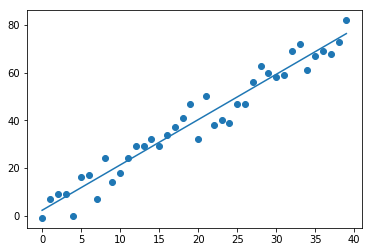

In [49]:
m,b=best_fit_slope_and_intercept(xs,ys)
regression_line=[(m*x)+b for x in xs]

plt.scatter(xs,ys)
plt.plot(xs,regression_line)
plt.show()

In [50]:
r_squared=coefficient_of_determination(ys,regression_line)
r_squared

0.95017046507620118